In [1]:
import os
from datetime import datetime

import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Make sure plots show in the notebook
%matplotlib inline

# Define ticker and dates
ticker = "^GSPC"  # S&P 500 index
start_date = "2020-01-01"
end_date = datetime.today().strftime("%Y-%m-%d")

print(f"Downloading data for {ticker} from {start_date} to {end_date}...")

data = yf.download(ticker, start=start_date, end=end_date)

print("Downloaded shape:", data.shape)
data.head()


C:\Users\Livkorg\AppData\Local\Temp\ipykernel_25300\92741802.py:18: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed

Downloaded shape: (1494, 5)


Price,Close,High,Low,Open,Volume
Ticker,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC
Date,,,,,
2020-01-02,3257.850098,3258.139893,3235.530029,3244.669922,3459930000
2020-01-03,3234.850098,3246.149902,3222.340088,3226.360107,3484700000
2020-01-06,3246.280029,3246.840088,3214.639893,3217.550049,3702460000
2020-01-07,3237.179932,3244.909912,3232.429932,3241.860107,3435910000
2020-01-08,3253.050049,3267.070068,3236.669922,3238.590088,3726840000


In [2]:
# Ensure the raw data folder exists
raw_dir = "../02_Data/Raw"
os.makedirs(raw_dir, exist_ok=True)

raw_path = os.path.join(raw_dir, "sp500_prices_raw.csv")

# Reset index so Date becomes a column
data_reset = data.reset_index()
data_reset.to_csv(raw_path, index=False)

print("Saved raw data to:", raw_path)
data_reset.head()


Saved raw data to: ../02_Data/Raw\sp500_prices_raw.csv


Price,Date,Close,High,Low,Open,Volume
Ticker,,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC
0,2020-01-02,3257.850098,3258.139893,3235.530029,3244.669922,3459930000
1,2020-01-03,3234.850098,3246.149902,3222.340088,3226.360107,3484700000
2,2020-01-06,3246.280029,3246.840088,3214.639893,3217.550049,3702460000
3,2020-01-07,3237.179932,3244.909912,3232.429932,3241.860107,3435910000
4,2020-01-08,3253.050049,3267.070068,3236.669922,3238.590088,3726840000


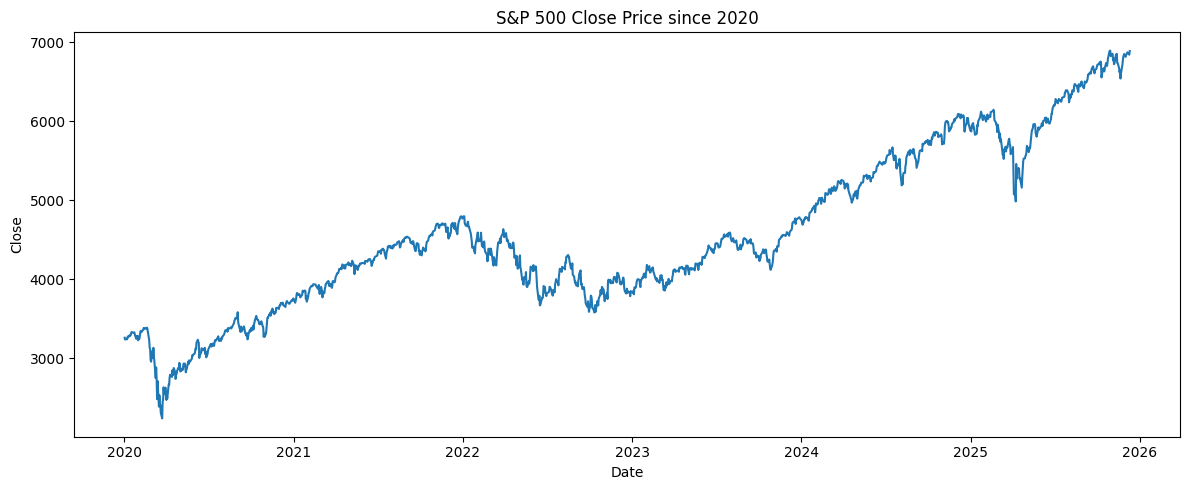

In [3]:
plt.figure(figsize=(12, 5))
plt.plot(data_reset["Date"], data_reset["Close"])
plt.title("S&P 500 Close Price since 2020")
plt.xlabel("Date")
plt.ylabel("Close")
plt.tight_layout()
plt.show()


In [4]:
print("Date range:", data_reset["Date"].min(), "to", data_reset["Date"].max())
print("Number of rows:", len(data_reset))

# Look for missing values
print("\nMissing values per column:")
print(data_reset.isna().sum())


Date range: 2020-01-02 00:00:00 to 2025-12-10 00:00:00
Number of rows: 1494

Missing values per column:
Price   Ticker
Date              0
Close   ^GSPC     0
High    ^GSPC     0
Low     ^GSPC     0
Open    ^GSPC     0
Volume  ^GSPC     0
dtype: int64


### Week 2 – News data & sentiment

In [ ]:
import pandas as pd

clean_path = "../02_Data/Processed/sp500_prices_clean.csv"
df_clean = pd.read_csv(clean_path)

df_clean.head()


In [6]:
print(df_clean.columns.tolist())
print("Number of rows:", len(df_clean))


['Date', 'Close', 'High', 'Low', 'Open', 'Volume', 'log_return', 'ma_5', 'ma_20', 'rolling_vol_20']
Number of rows: 1474


In [10]:
import pandas as pd

news_path = "../02_Data/Raw/sp500_news_raw_stub.csv"
df_news = pd.read_csv(news_path)

print(df_news.head())
print("\nColumns:", df_news.columns.tolist())
print("Number of rows:", len(df_news))


  published_at                     headline       source
0   2020-01-01  Market update on 2020-01-01  stub_source
1   2020-01-02  Market update on 2020-01-02  stub_source
2   2020-01-03  Market update on 2020-01-03  stub_source
3   2020-01-06  Market update on 2020-01-06  stub_source
4   2020-01-07  Market update on 2020-01-07  stub_source

Columns: ['published_at', 'headline', 'source']
Number of rows: 65


In [11]:
import pandas as pd

news_path = "../02_Data/Raw/sp500_news_raw.csv"
df_news = pd.read_csv(news_path)

print(df_news.head())
print("\nColumns:", df_news.columns.tolist())
print("Number of rows:", len(df_news))


  published_at                                         headline       source
0   2020-01-01  Market update on 2020-01-01 for query 'S&P 500'  stub_source
1   2020-01-02  Market update on 2020-01-02 for query 'S&P 500'  stub_source
2   2020-01-03  Market update on 2020-01-03 for query 'S&P 500'  stub_source
3   2020-01-06  Market update on 2020-01-06 for query 'S&P 500'  stub_source
4   2020-01-07  Market update on 2020-01-07 for query 'S&P 500'  stub_source

Columns: ['published_at', 'headline', 'source']
Number of rows: 65


In [12]:
import pandas as pd

detailed_path = "../02_Data/Processed/sp500_news_sentiment_detailed.csv"
df_sent = pd.read_csv(detailed_path)

print(df_sent.head())
print("\nColumns:", df_sent.columns.tolist())
print("Number of rows:", len(df_sent))


  published_at                                         headline       source  \
0   2020-01-01  Market update on 2020-01-01 for query 'S&P 500'  stub_source   
1   2020-01-02  Market update on 2020-01-02 for query 'S&P 500'  stub_source   
2   2020-01-03  Market update on 2020-01-03 for query 'S&P 500'  stub_source   
3   2020-01-06  Market update on 2020-01-06 for query 'S&P 500'  stub_source   
4   2020-01-07  Market update on 2020-01-07 for query 'S&P 500'  stub_source   

   sentiment_neg  sentiment_neu  sentiment_pos  sentiment_compound  
0            0.0            1.0            0.0                 0.0  
1            0.0            1.0            0.0                 0.0  
2            0.0            1.0            0.0                 0.0  
3            0.0            1.0            0.0                 0.0  
4            0.0            1.0            0.0                 0.0  

Columns: ['published_at', 'headline', 'source', 'sentiment_neg', 'sentiment_neu', 'sentiment_pos', 'sent

In [13]:
import pandas as pd

features_path = "../02_Data/Processed/sp500_features_daily.csv"
df_features = pd.read_csv(features_path)

print(df_features.head())
print("\nColumns:", df_features.columns.tolist())
print("Number of rows:", len(df_features))


         Date        Close         High          Low         Open  \
0  2020-01-31  3225.520020  3282.330078  3214.679932  3282.330078   
1  2020-02-03  3248.919922  3268.439941  3235.659912  3235.659912   
2  2020-02-04  3297.590088  3306.919922  3280.610107  3280.610107   
3  2020-02-05  3334.689941  3337.580078  3313.750000  3324.909912   
4  2020-02-06  3345.780029  3347.959961  3334.389893  3344.919922   

         Volume  log_return         ma_5        ma_20  rolling_vol_20  \
0  4.529700e+09   -0.017864  3260.489941  3279.220496        0.007441   
1  3.760460e+09    0.007228  3261.547949  3279.923987        0.007463   
2  3.996900e+09    0.014869  3265.817969  3282.489490        0.008129   
3  4.121480e+09    0.011188  3278.075977  3287.364990        0.008401   
4  3.887250e+09    0.003320  3290.500000  3292.001489        0.008375   

   sentiment_mean  sentiment_pos_mean  sentiment_neg_mean  news_count  
0             0.0                 0.0                 0.0         1.0  
1 

In [14]:
print(df_features[["log_return", "sentiment_mean"]].corr())


                log_return  sentiment_mean
log_return             1.0             NaN
sentiment_mean         NaN             NaN


### Week 3 – EDA & baselines

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

features_path = "../02_Data/Processed/sp500_features_daily.csv"
df = pd.read_csv(features_path, parse_dates=["Date"])

df.head()


,Date,Close,High,Low,Open,Volume,log_return,ma_5,ma_20,rolling_vol_20,sentiment_mean,sentiment_pos_mean,sentiment_neg_mean,news_count
0,2020-01-31,3225.520020,3282.330078,3214.679932,3282.330078,4.529700e+09,-0.017864,3260.489941,3279.220496,0.007441,0.0,0.0,0.0,1.0
1,2020-02-03,3248.919922,3268.439941,3235.659912,3235.659912,3.760460e+09,0.007228,3261.547949,3279.923987,0.007463,0.0,0.0,0.0,1.0
2,2020-02-04,3297.590088,3306.919922,3280.610107,3280.610107,3.996900e+09,0.014869,3265.817969,3282.489490,0.008129,0.0,0.0,0.0,1.0
3,2020-02-05,3334.689941,3337.580078,3313.750000,3324.909912,4.121480e+09,0.011188,3278.075977,3287.364990,0.008401,0.0,0.0,0.0,1.0
4,2020-02-06,3345.780029,3347.959961,3334.389893,3344.919922,3.887250e+09,0.003320,3290.500000,3292.001489,0.008375,0.0,0.0,0.0,1.0


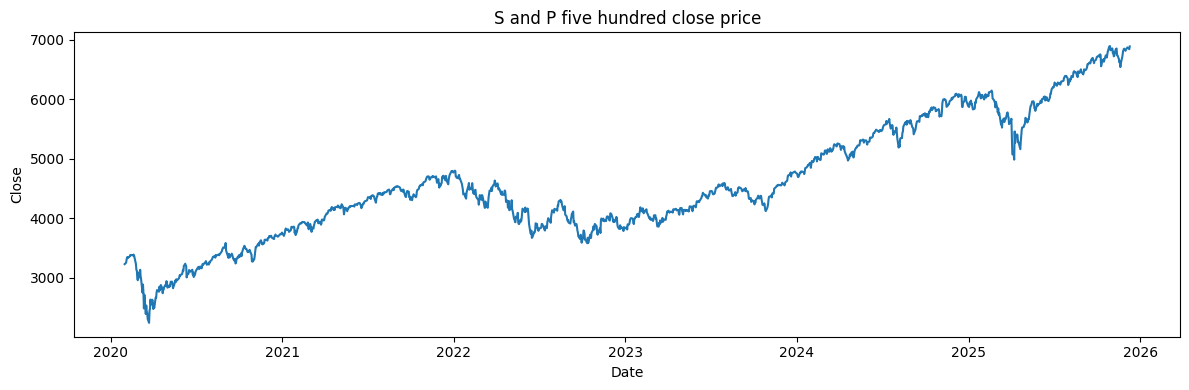

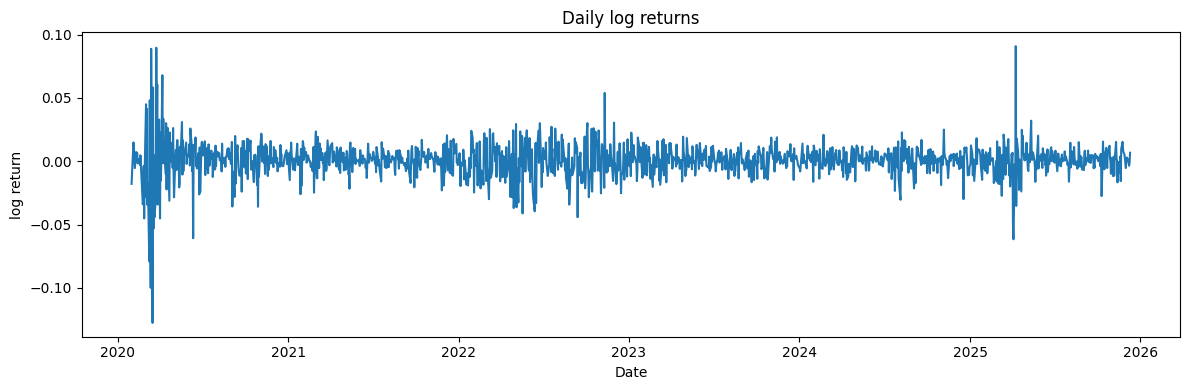

In [16]:
plt.figure(figsize=(12, 4))
plt.plot(df["Date"], df["Close"])
plt.title("S and P five hundred close price")
plt.xlabel("Date")
plt.ylabel("Close")
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 4))
plt.plot(df["Date"], df["log_return"])
plt.title("Daily log returns")
plt.xlabel("Date")
plt.ylabel("log return")
plt.tight_layout()
plt.show()


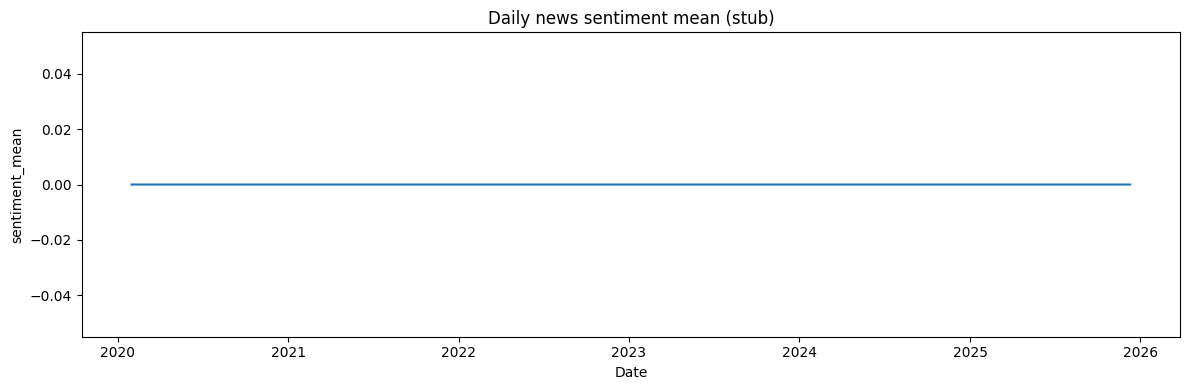

In [17]:
plt.figure(figsize=(12, 4))
plt.plot(df["Date"], df["sentiment_mean"])
plt.title("Daily news sentiment mean (stub)")
plt.xlabel("Date")
plt.ylabel("sentiment_mean")
plt.tight_layout()
plt.show()


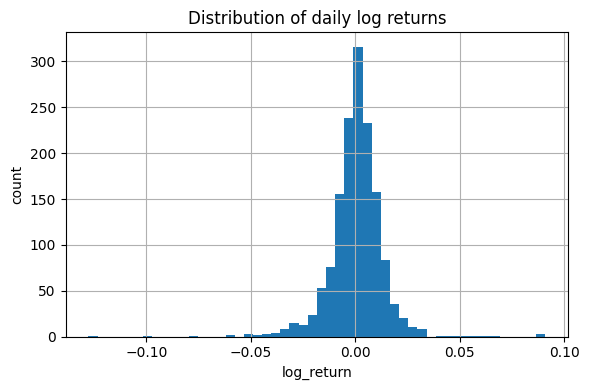

In [18]:
plt.figure(figsize=(6, 4))
df["log_return"].hist(bins=50)
plt.title("Distribution of daily log returns")
plt.xlabel("log_return")
plt.ylabel("count")
plt.tight_layout()
plt.show()


In [19]:
numeric_cols = [
    "log_return",
    "ma_5",
    "ma_20",
    "rolling_vol_20",
    "sentiment_mean",
    "news_count",
]

corr = df[numeric_cols].corr()
corr


,log_return,ma_5,ma_20,rolling_vol_20,sentiment_mean,news_count
log_return,1.000000,-0.002009,-0.007329,0.010105,NaN,-0.079676
ma_5,-0.002009,1.000000,0.995897,-0.435221,NaN,-0.272806
ma_20,-0.007329,0.995897,1.000000,-0.411326,NaN,-0.248284
rolling_vol_20,0.010105,-0.435221,-0.411326,1.000000,NaN,0.372810
sentiment_mean,NaN,NaN,NaN,NaN,NaN,NaN
news_count,-0.079676,-0.272806,-0.248284,0.372810,NaN,1.000000


Observations

* Close price shows a strong drop around early 2020, then a recovery and growth.
* Daily log returns fluctuate around zero with occasional spikes.
* In the stub version, sentiment_mean is constant at zero, so correlation with returns is not informative.
* Rolling volatility seems higher around crisis periods, which is expected.
